In [1]:
import pandas as pd 


In [2]:
"""Кейс 1. Uniqlo"""
df = pd.read_csv('Uniqlo.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Stock Trading
0,2016-12-30,42120,42330,41700,41830,610000,25628028000
1,2016-12-29,43000,43220,42540,42660,448400,19188227000
2,2016-12-28,43940,43970,43270,43270,339900,14780670000
3,2016-12-27,43140,43700,43140,43620,400100,17427993000
4,2016-12-26,43310,43660,43090,43340,358200,15547803000


In [3]:
#cмотрим типы объектов и пропущенные значения. Вывод -- у даты неправильный тип данных, None значения отсутствуют
print(df.info())
print('-' * 20)
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1226 entries, 0 to 1225
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           1226 non-null   object
 1   Open           1226 non-null   int64 
 2   High           1226 non-null   int64 
 3   Low            1226 non-null   int64 
 4   Close          1226 non-null   int64 
 5   Volume         1226 non-null   int64 
 6   Stock Trading  1226 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 67.2+ KB
None
--------------------
Date             0
Open             0
High             0
Low              0
Close            0
Volume           0
Stock Trading    0
dtype: int64


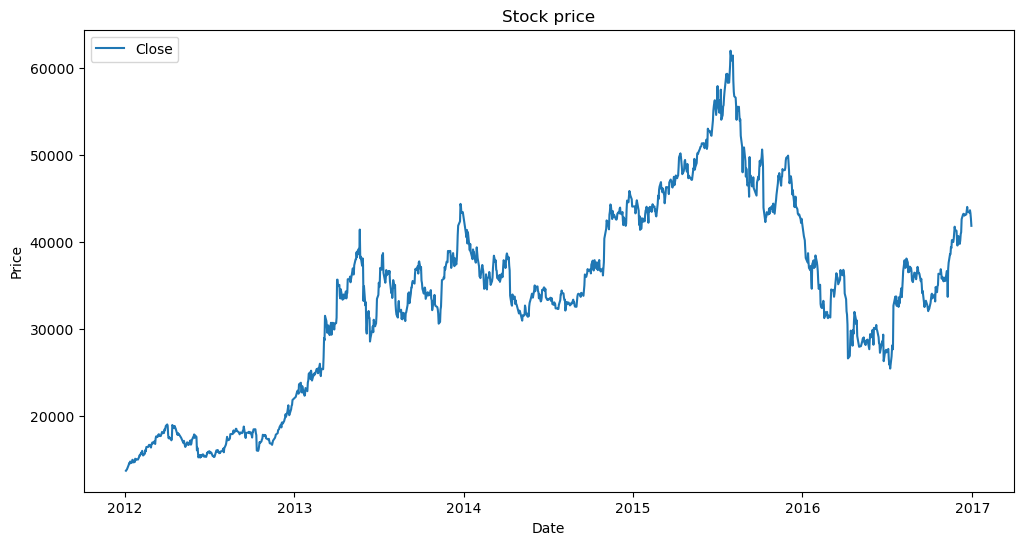

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Date', y='Close', label='Close')


plt.title('Stock price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')

# Отобразим график
plt.show()


In [5]:
#интерактивный график
import plotly.express as px
fig = px.line(df, x='Date', y='Close', title='Stock pricing')
fig


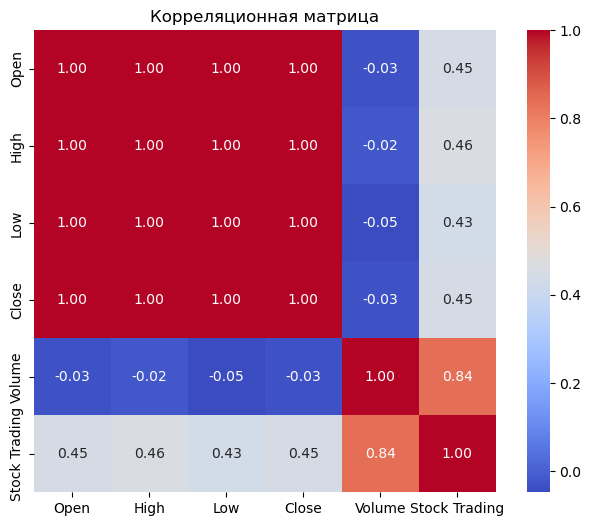

'Из кореляционный матрицы видно, что параметры Open, High, Low, Close сильно коррелируют между собой. \nТакже сильная корреляция прослеживается между параметрами Volume и Stock Trading.\nОтносительно невысокая корреляция между параметрами Open, High, Low, Close и Stock Trading\nКорреляция полностью отсутсвует между параметрами  Open, High, Low, Close и Volume\n'

In [13]:
# Корреляционный анализ
correlation_matrix = df.corr()

# Визуализация матрицы корреляции
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, fmt=".2f")
plt.title('Корреляционная матрица')
plt.show()

"""Из кореляционный матрицы видно, что параметры Open, High, Low, Close сильно коррелируют между собой. 
Также сильная корреляция прослеживается между параметрами Volume и Stock Trading.
Относительно невысокая корреляция между параметрами Open, High, Low, Close и Stock Trading
Корреляция полностью отсутсвует между параметрами  Open, High, Low, Close и Volume
"""

In [9]:
"""Сформулируем гипотезы
(H0): Нет статистически значимой зависимости между параметром Close и параметром Stock Trading и Volume.
(H1): Существует статистически значимая зависимость между параметром Close и параметром Stock Trading и Volume.
Принимаем H0, так как p-value>t-statistic"""
import scipy.stats as stats
t_stat, p_value = stats.ttest_ind(df['Close'], df['Stock Trading'])
print(f"t-statistic: {t_stat}, p-value: {p_value}")

t-statistic: -55.99646191875996, p-value: 0.0


In [11]:
import scipy.stats as stats
t_stat, p_value = stats.ttest_ind(df['Close'], df['Volume'])
print(f"t-statistic: {t_stat}, p-value: {p_value}")

t-statistic: -58.69807992236846, p-value: 0.0


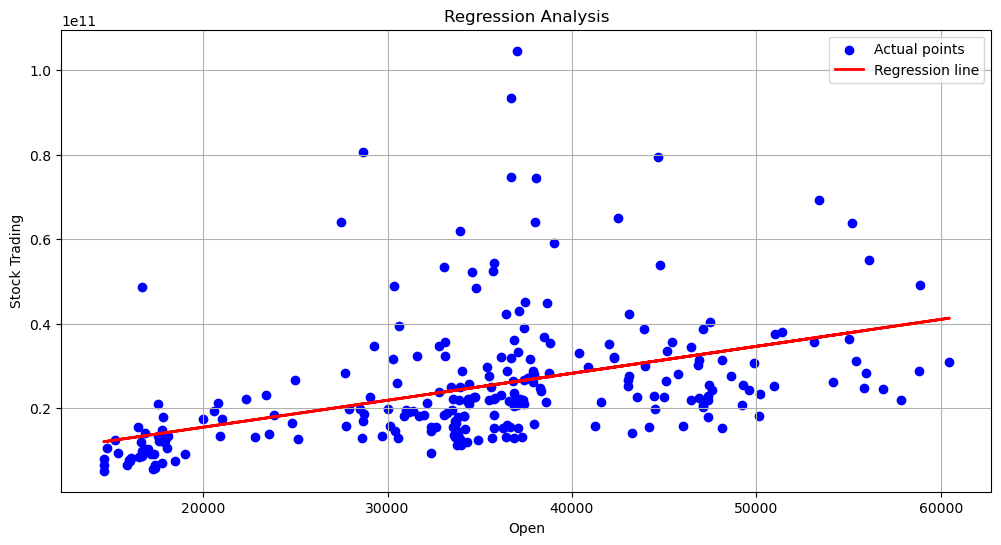

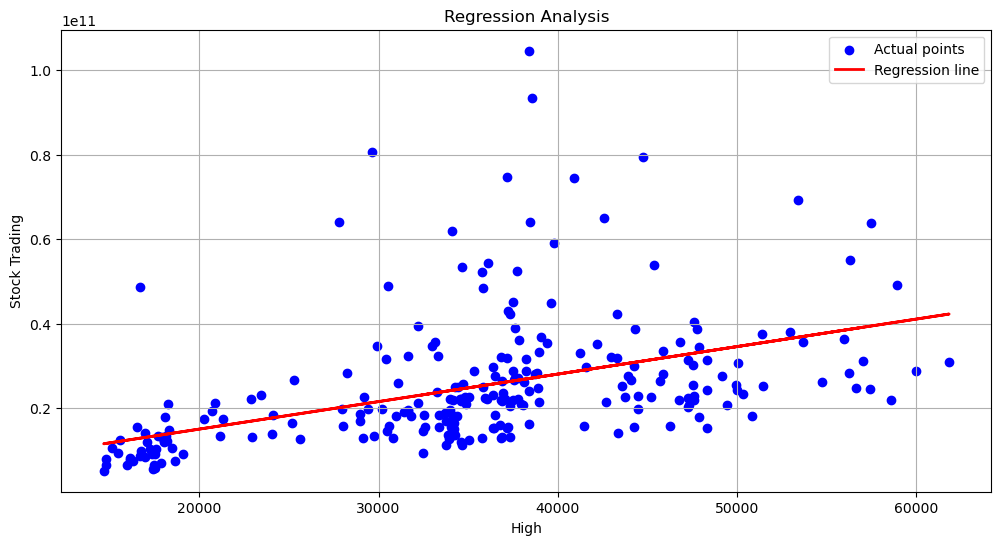

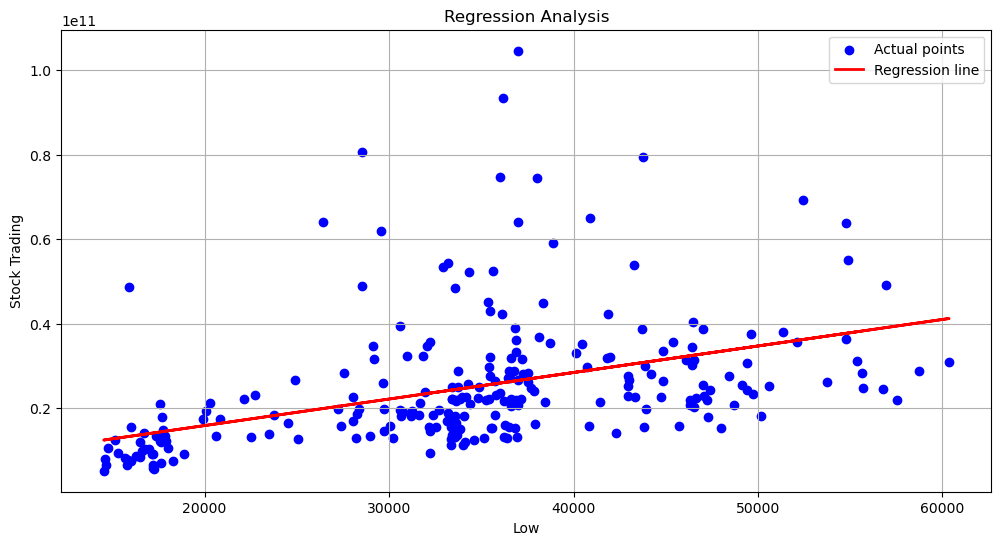

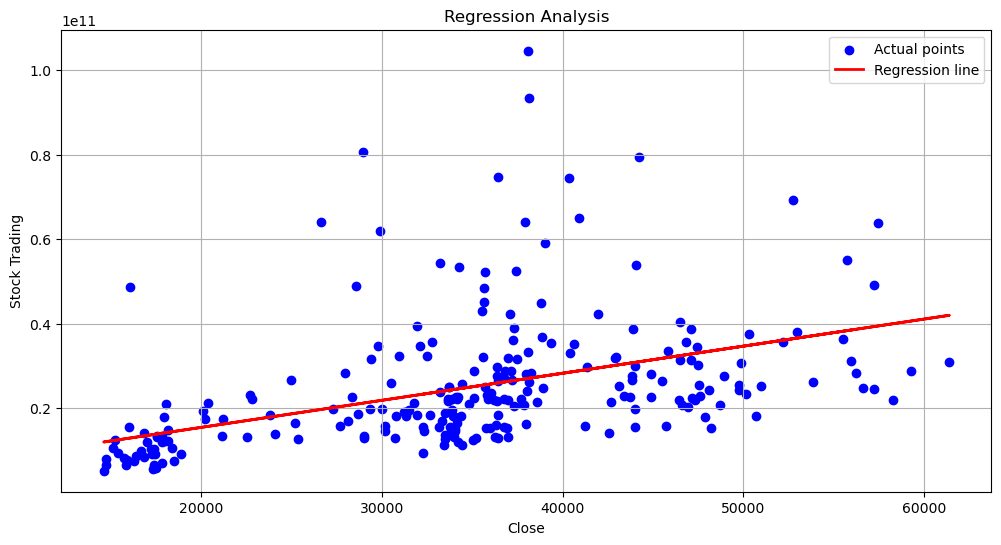

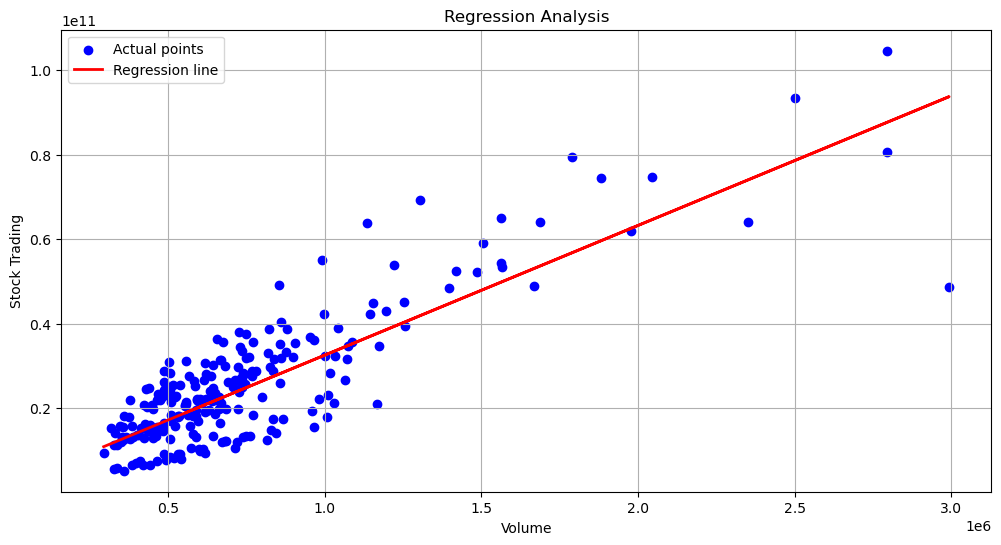

[('Open', 0.1652596748563241, 9190437269.652584, 2.0230389853254e+20),
 ('High', 0.1759454452978071, 9116913197.485329, 1.9971414342664677e+20),
 ('Low', 0.1530320632678055, 9276734873.413967, 2.052673273014487e+20),
 ('Close', 0.1629321906036706, 9214311440.409227, 2.028679771135093e+20),
 ('Volume', 0.7226564209391757, 5965074072.170926, 6.721573834032181e+19)]

In [15]:
#построим модель линейной регресии
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

numeric_columns = df.select_dtypes(include=[np.number])
feature_columns = numeric_columns.drop(columns='Stock Trading').columns

metrics = []

for feature_column in feature_columns:
    X = numeric_columns[[feature_column]]
    y = numeric_columns['Stock Trading']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    # Предсказание на тестовой выборке
    y_pred = lr_model.predict(X_test)

    # Вычисление метрик качества модели
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    metrics.append((feature_column, r2, mae, mse))

    plt.figure(figsize=(12, 6))
    plt.scatter(X_test, y_test, color='blue', label='Actual points')
    plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression line')
    plt.xlabel(feature_column)
    plt.ylabel('Stock Trading')
    plt.title('Regression Analysis')
    plt.legend()
    plt.grid(True)
    plt.show()

metrics



Volume имеет наивысший коэффициент детерминации (0.7227), что означает, что модель линейной регрессии лучше объясняет изменения в целевой переменной Stock Trading при использовании Volume в качестве предиктора. Это также подтверждается относительно низким значением MAE для Volume.

Остальные переменные (Open, High, Low, Close) имеют более низкие коэффициенты детерминации и более высокие значения MSE, что указывает на то, что они объясняют меньшую часть изменчивости в целевой переменной и дают более большие ошибки при прогнозировании Stock Trading.

Сравнительно низкий коэффициент детерминации для всех переменных может указывать на то, что линейная модель может быть недостаточно информативной для предсказания Stock Trading

При анализе метрик R-squared и MSE, Volume  выделяется как наиболее информативный предиктор для данного набора данных.

Общий вывод: модель с использованием Volume как предиктора может быть более эффективной для прогнозирования Stock Trading.





